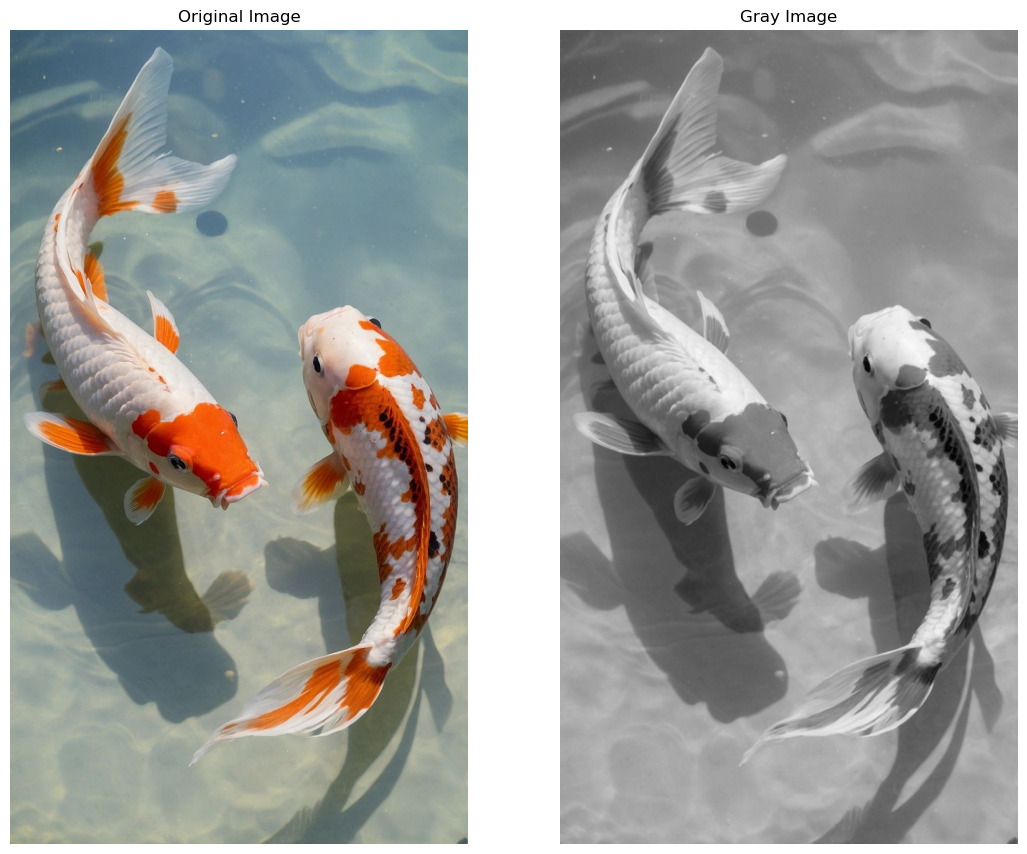

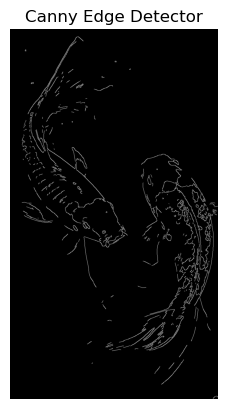

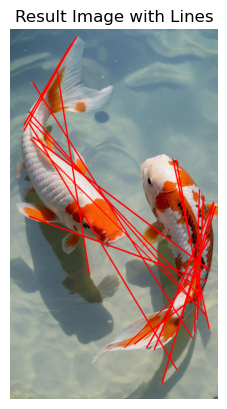

In [8]:


import numpy as np
import cv2
import matplotlib.pyplot as plt

# READ THE GRAY IMAGE USING IMREAD
gray = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'image.jpg' with your actual image path

# READ THE COLOR IMAGE USING IMREAD
img = cv2.imread('fish.jpg')  # BGR format by default

# CONVERT THE COLOR FROM BGR TO RGB
img_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# CONVERT THE GRAY TO RGB FOR DISPLAY PURPOSES (OPTIONAL, if needed for color consistency in plots)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# APPLY GAUSSIAN BLUR TO THE GRAYSCALE IMAGE
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

# DISPLAY ORIGINAL AND GRAYSCALE IMAGE
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img_c)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_blur, cmap='gray')
plt.title("Gray Image")
plt.axis("off")
plt.show()

# APPLY CANNY EDGE DETECTOR
canny = cv2.Canny(gray_blur, 120, 150)

# DISPLAY THE CANNY IMAGE
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detector")
plt.axis("off")
plt.show()

# APPLY HOUGH LINE TRANSFORM
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=250)

# DRAW LINES ON THE ORIGINAL COLOR IMAGE
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_c, (x1, y1), (x2, y2), (255, 0, 0), 3)

# DISPLAY THE FINAL RESULT
plt.imshow(img_c)
plt.title("Result Image with Lines")
plt.axis("off")
plt.show()

